In [2]:
# A seguir vamos utilizar métodos de análise exploratória em um dataset referente as olimpíadas
#fornecido pelo kaggle
# https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

import pandas as pd
import matplotlib.pyplot as plt

#tabela com dados das olimpíadas
dados = pd.read_csv(r'D:\Python\dataset\athlete_events.csv')

print(dados.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [3]:
# verificamos número de linhas e colunas

dados.shape

(271116, 15)

In [4]:
# verificando os tipos dos dados armazenados e o número de dados não-nulos

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
# selecionando apenas variáveis com dados numéricos

dados_num = dados.select_dtypes(['int64', 'float64'])
print(dados_num)

# Com dados numéricos podemos obter média, valor máximo e mínimo, desvio etc...

dados_num.drop(['ID', 'Year'], axis=1).describe() #abandonando *temporariamente* as colunas ID e Year

            ID   Age  Height  Weight  Year
0            1  24.0   180.0    80.0  1992
1            2  23.0   170.0    60.0  2012
2            3  24.0     NaN     NaN  1920
3            4  34.0     NaN     NaN  1900
4            5  21.0   185.0    82.0  1988
...        ...   ...     ...     ...   ...
271111  135569  29.0   179.0    89.0  1976
271112  135570  27.0   176.0    59.0  2014
271113  135570  27.0   176.0    59.0  2014
271114  135571  30.0   185.0    96.0  1998
271115  135571  34.0   185.0    96.0  2002

[271116 rows x 5 columns]


,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


0         24.691358
1         20.761246
2               NaN
3               NaN
4         23.959094
            ...    
271111    27.776911
271112    19.047004
271113    19.047004
271114    28.049671
271115    28.049671
Name: IMC, Length: 271116, dtype: float64


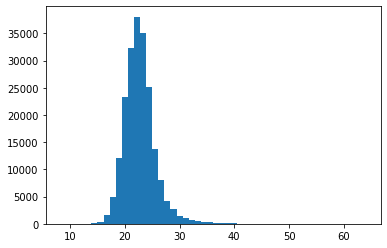

In [6]:
# Criando uma nova coluna contendo o IMC dos participantes
# IMC é definido como sendo a razão entra a massa e a altura ao quadrado
#no sistema internacional de unidades

dados_num['IMC'] = dados_num['Weight']/(dados_num['Height']/100)**2
print(dados_num['IMC'])

# Criando um histograma para uma melhor visualização da distribuição de valores

plt.hist(dados_num['IMC'], 50)
plt.show()

In [7]:
# Número de atletas registrados com IMC classíficado como eutrofia (estado nutricional adequado):

eutrofia = (dados_num['IMC'].loc[(dados_num['IMC']< 25) & (dados_num['IMC']>18.5)].value_counts().sum())/(dados_num['IMC'].value_counts().sum())*100
print(f'Porcentagem de atletas com IMC eutrofia: {eutrofia}')

Porcentagem de atletas com IMC eutrofia: 79.51153717857609


In [38]:
# Substituindo os valores faltantes por 0 (assumindo que os valores faltantes correspondem a não medalhistas)

dados['Medal'].fillna(0, inplace=True)

# Visualizando o número de medalhas de bronza, prata e ouro documentadas

dados['Medal'].value_counts()

0         231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [20]:
# Separando o dados referentes a atletas masculinos e femininos

dadosM = dados.loc[dados['Sex']=='M']
dadosF = dados.loc[dados['Sex']=='F']

# Porcentagem de medalhas recebidas por atletas masculinos e femininos

medalM = dadosM['Medal'].value_counts().sum()/(dados['Medal'].value_counts().sum())*100
medalF = dadosF['Medal'].value_counts().sum()/(dados['Medal'].value_counts().sum())*100
print(f' {medalM.round(1)}% das medalhas documentadas são de atletas masculinos')

 71.7% das medalhas documentadas são de atletas masculinos


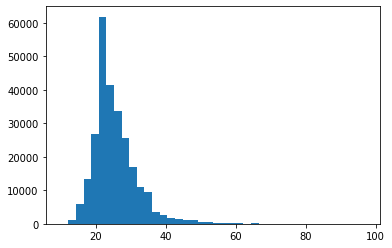

Informações do atleta:
           ID                Name Sex   Age  Height  Weight  \
142882  71691  Dimitrios Loundras   M  10.0     NaN     NaN   

                                 Team  NOC        Games  Year  Season    City  \
142882  Ethnikos Gymnastikos Syllogos  GRE  1896 Summer  1896  Summer  Athina   

             Sport                                  Event   Medal  
142882  Gymnastics  Gymnastics Men's Parallel Bars, Teams  Bronze  


In [44]:
# Explorando os dados com base na idade dos participantes

plt.hist(dados['Age'], 40)
plt.show()

# Utilizando o método .describe() anteriormente, podemos notar que o participante com idade
#mínima registrado tem 10 anos.
# Explorando os dados referentes a este participante

print('Informações do atleta:')
print(dados.loc[dados['Age']==10])
